# FINM 36700 Portfolio and Risk Management
#Homework 4 solutions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model
from arch.univariate import GARCH, EWMAVariance 
from sklearn import linear_model
import scipy
from scipy.stats import kurtosis, skew
import scipy.stats as stats
from statsmodels.regression.rolling import RollingOLS
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.precision", 4)

# Solution#2

In [6]:
df = pd.read_excel('/Users/vidhanajmera/Desktop/Portfolio and Risk Management/finm-portfolio-2022/data/dfa_analysis_data.xlsx', sheet_name = 1)
df = df.set_index('Date')
df


,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1926-08-31,0.0264,-0.0117,0.0382,0.0025
1926-09-30,0.0036,-0.0140,0.0013,0.0023
1926-10-31,-0.0324,-0.0009,0.0070,0.0032
1926-11-30,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...
2022-04-30,-0.0946,-0.0141,0.0619,0.0001
2022-05-31,-0.0034,-0.0185,0.0841,0.0003
2022-06-30,-0.0843,0.0209,-0.0597,0.0006


In [9]:
factors = df.drop('RF',axis = 1)


In [10]:
factors 

,Mkt-RF,SMB,HML
Date,,,
1926-07-31,0.0296,-0.0256,-0.0243
1926-08-31,0.0264,-0.0117,0.0382
1926-09-30,0.0036,-0.0140,0.0013
1926-10-31,-0.0324,-0.0009,0.0070
1926-11-30,0.0253,-0.0010,-0.0051
...,...,...,...
2022-04-30,-0.0946,-0.0141,0.0619
2022-05-31,-0.0034,-0.0185,0.0841
2022-06-30,-0.0843,0.0209,-0.0597


In [11]:
# 1
def summary_stats(df, annual_fac):
    ss_df = (df.mean() * annual_fac).to_frame('Mean')
    ss_df['Vol'] = df.std() * np.sqrt(annual_fac)
    ss_df['Sharpe'] = ss_df['Mean'] / ss_df['Vol']
    ss_df['VaR'] = df.quantile(0.05)
    return ss_df.T

In [12]:
print("Subsample period: Beginning - 1980")
summary_stats(factors[:"1980"],12)

Subsample period: Beginning - 1980


,Mkt-RF,SMB,HML
Mean,0.0811,0.0340,0.0495
Vol,0.2051,0.1146,0.1338
Sharpe,0.3957,0.2966,0.3697
VaR,-0.0840,-0.0434,-0.0429


In [13]:
print("Subsample period: 1981 - 2001")
summary_stats(factors["1981":"2001"],12)

Subsample period: 1981 - 2001


,Mkt-RF,SMB,HML
Mean,0.0773,-0.0009,0.0637
Vol,0.1574,0.1184,0.1113
Sharpe,0.4908,-0.0074,0.5727
VaR,-0.0645,-0.0466,-0.0418


In [14]:
print("Subsample period: 2002 - End")
summary_stats(factors["2002":],12)

Subsample period: 2002 - End


,Mkt-RF,SMB,HML
Mean,0.0833,0.0196,0.0017
Vol,0.1540,0.0858,0.1045
Sharpe,0.5409,0.2288,0.0161
VaR,-0.0788,-0.0378,-0.0410


In [15]:
print("Subsample period: 1990 - 1999")
summary_stats(factors["1990":"1999"],12)

Subsample period: 1990 - 1999


,Mkt-RF,SMB,HML
Mean,0.1276,-0.0142,-0.0011
Vol,0.1383,0.1037,0.0917
Sharpe,0.9230,-0.1365,-0.0122
VaR,-0.0494,-0.0513,-0.0403


Calculation for q2

In [19]:
print("Subsample period: beginning - 1989")
summary_stats(factors[:"1989"],12)

Subsample period: beginning - 1989


,Mkt-RF,SMB,HML
Mean,0.0798,0.0284,0.0550
Vol,0.1998,0.1103,0.1286
Sharpe,0.3996,0.2576,0.4272
VaR,-0.0810,-0.0414,-0.0421


In [20]:
print("Subsample period: beginning - 1989")
summary_stats(factors["2000":],12)

Subsample period: beginning - 1989


,Mkt-RF,SMB,HML
Mean,0.0626,0.0255,0.0261
Vol,0.1589,0.1117,0.1203
Sharpe,0.3942,0.2282,0.2169
VaR,-0.0812,-0.0408,-0.0469


2. Based on the factor statistics above, answer the following.

(a) Does each factor have a premium (positive expected excess return) in each subsample?

<span style="color:#00008B">**Solution:**</span> No. From 2002 to the end of the data period, the value factor had a negative expected excess return. 

(b) Does the premium to the size factor get smaller after 1980?

<span style="color:#00008B">**Solution:**</span> The premium to the size factor even went to negative from 1981 to 2001, but it has gone back to positive since 2002. 

(c) Does the premium to the value factor get smaller during the 1990’s?

<span style="color:#00008B">**Solution:**</span> Yes, the premium to the value factor gets smaller and negative during 1990's compared to previous years, but it gets back to positive after 2000.

(d) How have the factors performed since the time of the case, (2002-present)?

<span style="color:#00008B">**Solution:**</span> The market factor performs the best among all three factors. The performance of size factor has become much better than that during 1980-2001, but still the best performance was before 1980 . Lastly, the value factor has such a poor performance during this period. The premium to the value factor has become negative. 

3. The factors are constructed in such a way as to reduce correlation between them.
Report the correlation matrix across the three factors. Does the construction method succeed in keeping correlations small? Does it achieve this in each subsample?

<span style="color:#00008B">**Solution:**</span> Overall, the correlations between these three factors are small. And the correlations in each subsample are small as well, though the correlations before 1980 are highest and correlations between 1981 to 2001 are lowest in the given samples.

In [21]:
factors.corr()

,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.3163,0.2297
SMB,0.3163,1.0000,0.1147
HML,0.2297,0.1147,1.0000


In [22]:
print("Subsample period: Beginning - 1980")
factors[:"1980"].corr()

Subsample period: Beginning - 1980


,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.3663,0.4378
SMB,0.3663,1.0000,0.3091
HML,0.4378,0.3091,1.0000


In [23]:
print("Subsample period: 1981 - 2001")
factors["1981":"2001"].corr()

Subsample period: 1981 - 2001


,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.1643,-0.5268
SMB,0.1643,1.0000,-0.4548
HML,-0.5268,-0.4548,1.0000


In [24]:
print("Subsample period: 2002 - End")
factors["2002":].corr()

Subsample period: 2002 - End


,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.3162,0.1317
SMB,0.3162,1.0000,0.0929
HML,0.1317,0.0929,1.0000


4. Plot the cumulative returns of the three factors. Create plots for the 1981-2001 subsample as well as the 2002-Present subsample.

In [38]:
factor_compare=factors.copy()
factor_compare['Zero premium line']=0
factor_compare

,Mkt-RF,SMB,HML,Zero premium line
Date,,,,
1926-07-31,0.0296,-0.0256,-0.0243,0
1926-08-31,0.0264,-0.0117,0.0382,0
1926-09-30,0.0036,-0.0140,0.0013,0
1926-10-31,-0.0324,-0.0009,0.0070,0
1926-11-30,0.0253,-0.0010,-0.0051,0
...,...,...,...,...
2022-04-30,-0.0946,-0.0141,0.0619,0
2022-05-31,-0.0034,-0.0185,0.0841,0
2022-06-30,-0.0843,0.0209,-0.0597,0


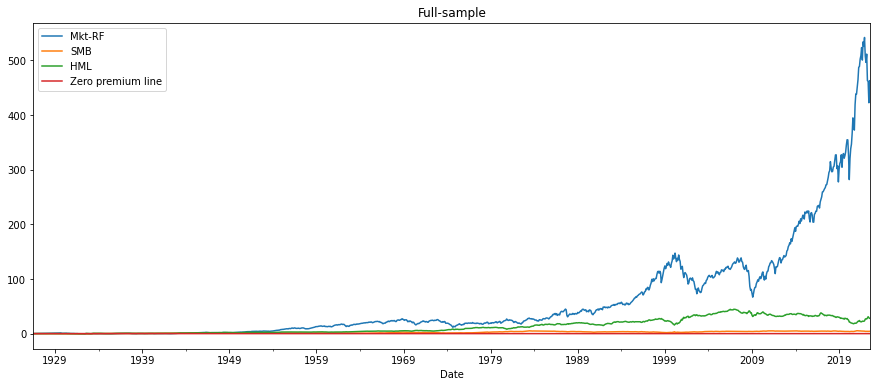

In [39]:
# 4
((factor_compare + 1).cumprod() - 1).plot(figsize=(15,6),title = "Full-sample");

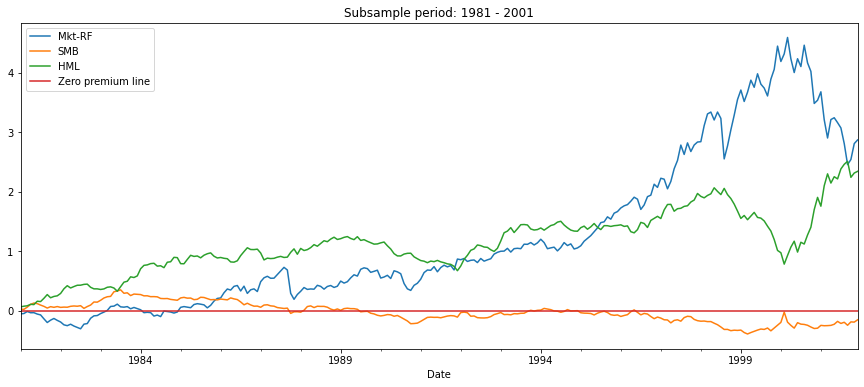

In [40]:
((factor_compare["1981":"2001"] + 1).cumprod() - 1).plot(figsize=(15,6),title = "Subsample period: 1981 - 2001");

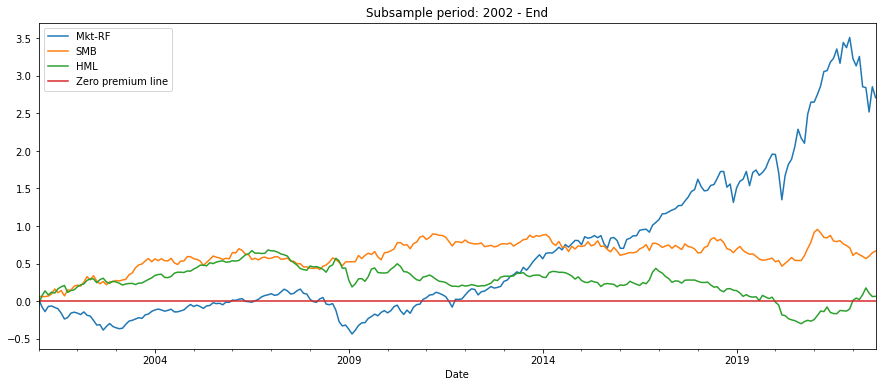

In [43]:
((factor_compare["2001":] + 1).cumprod() - 1).plot(figsize=(15,6),title = "Subsample period: 2002 - End");

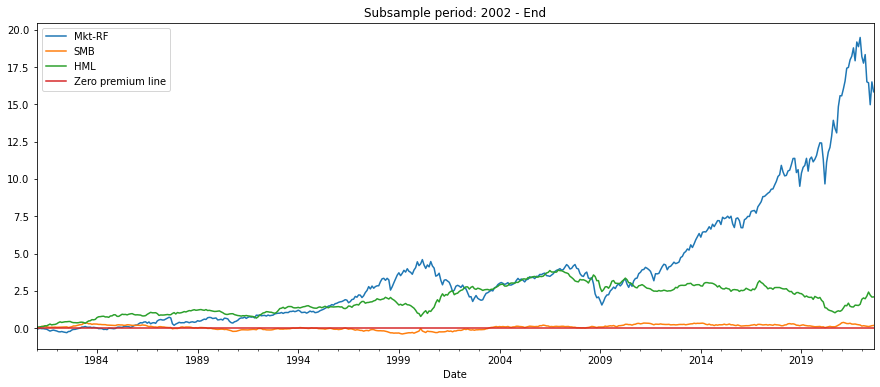

In [44]:
((factor_compare["1981":] + 1).cumprod() - 1).plot(figsize=(15,6),title = "Subsample period: 2002 - End");

5. Does it appear that all three factors were valuable in 1981-2001? And post-2001? Would you advise DFA to continue emphasizing all three factors?

<span style="color:#00008B">**Solution:**</span> The size factor has a negative premium for most of the years during 1981 to 2001. The value factor falls to negative post-2020, because of Covid-19 impact. However, even if SMB or HML have negative means or bad Sharpe ratios, they may still be valuable to DFA and DFAs investors due to their very small correlation to MKT. Thus, we shouldn’t rule them out just based on their stand-alone properties. We would want to examine their info ratios etc to better understand if they can be of use to an investor mostly invested in MKT.

# Solution#3

In [45]:
portfolios = pd.read_excel('/Users/vidhanajmera/Desktop/Portfolio and Risk Management/finm-portfolio-2022/data/dfa_analysis_data.xlsx', sheet_name = 2)
portfolios = portfolios.set_index('Date')
portfolios_ex = portfolios.subtract(df['RF'],axis = 'rows')
portfolios_ex

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.0560,-0.0192,0.0027,-0.0168,0.0183,0.0099,0.0220,0.0027,-0.0282,-0.0055,...,0.0137,0.0131,0.0108,0.0005,0.0225,0.0323,0.0587,0.0181,0.0289,0.0034
1926-08-31,-0.0227,-0.0828,0.0113,0.0121,0.0815,0.0211,-0.0143,0.0376,0.0025,0.0592,...,0.0108,0.0362,0.0175,0.0192,0.0509,0.0076,0.0394,0.0176,0.0523,0.0751
1926-09-30,-0.0506,-0.0285,-0.0457,-0.0350,0.0063,-0.0288,-0.0149,0.0085,-0.0378,-0.0117,...,0.0086,-0.0076,-0.0199,0.0123,0.0064,-0.0152,0.0342,-0.0014,-0.0098,-0.0266
1926-10-31,-0.0969,-0.0387,-0.0381,0.0312,-0.0287,-0.0313,-0.0359,-0.0539,-0.0834,-0.0164,...,-0.0366,-0.0298,-0.0243,-0.0343,-0.0567,-0.0306,-0.0333,-0.0256,-0.0499,-0.0613
1926-11-30,0.0528,0.0388,0.0215,-0.0476,0.0023,0.0279,-0.0268,0.0270,0.0484,0.0242,...,0.0313,0.0208,0.0342,0.0462,0.0151,0.0398,0.0222,0.0121,0.0335,0.0225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,-0.1616,-0.1325,-0.1000,-0.0635,-0.0411,-0.1820,-0.1208,-0.0855,-0.0630,-0.0598,...,-0.1074,-0.0805,-0.0484,-0.0569,-0.0706,-0.1087,-0.0922,-0.0716,-0.0553,-0.0743
2022-05-31,-0.0586,-0.0359,-0.0101,-0.0018,0.0293,-0.0332,-0.0285,0.0198,0.0401,0.0572,...,-0.0298,0.0111,0.0403,0.0086,0.0826,-0.0304,-0.0035,0.0278,0.0644,0.0637
2022-06-30,-0.0671,-0.0433,-0.0431,-0.0663,-0.0994,-0.0211,-0.0630,-0.0685,-0.0628,-0.1303,...,-0.0735,-0.0957,-0.1123,-0.1016,-0.1330,-0.0787,-0.0559,-0.0884,-0.1216,-0.1224


In [46]:
subsample = portfolios_ex["1981":]

In [47]:
#1
summary_stats(subsample,12)

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Mean,0.0105,0.0957,0.0929,0.1200,0.1321,0.0603,0.1006,0.1066,0.1077,0.1181,...,0.0927,0.0945,0.0936,0.0998,0.1120,0.0889,0.0816,0.0811,0.0671,0.0963
Vol,0.2724,0.2359,0.1972,0.1914,0.2077,0.2457,0.2032,0.1831,0.1792,0.2120,...,0.2036,0.1770,0.1733,0.1733,0.1968,0.1632,0.1549,0.1523,0.1703,0.2058
Sharpe,0.0384,0.4058,0.4711,0.6270,0.6361,0.2453,0.4953,0.5824,0.6012,0.5571,...,0.4551,0.5341,0.5402,0.5756,0.5693,0.5447,0.5271,0.5324,0.3943,0.4681
VaR,-0.1165,-0.0976,-0.0864,-0.0752,-0.0883,-0.1046,-0.0840,-0.0787,-0.0764,-0.0942,...,-0.0839,-0.0734,-0.0756,-0.0693,-0.0833,-0.0753,-0.0656,-0.0704,-0.0756,-0.0985


In [48]:
port_summary = summary_stats(subsample,12).T
port_summary['portfolio_num'] = range(1,26)

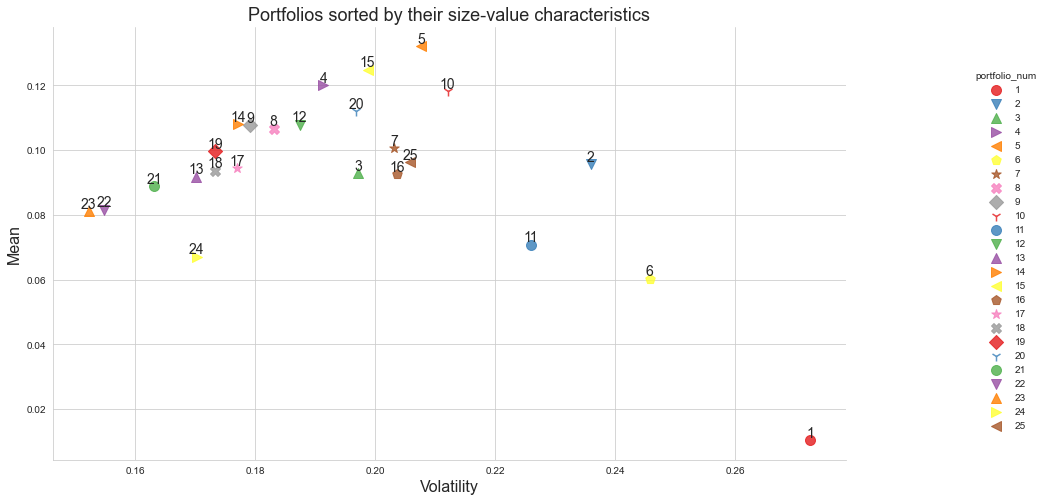

In [49]:
markers=['o', 'v', '^', '>', '<', 'p', '*', 'X', 'D', '1','o',\
         'v', '^', '>', '<', 'p', '*', 'X', 'D', '1','o', 'v', '^', '>', '<']
sns.set_style("whitegrid")
ax = sns.lmplot('Vol', # Horizontal axis
               'Mean', # Vertical axis
               hue='portfolio_num',palette="Set1",scatter_kws={"s": 100},
                data=port_summary, # Data source
               fit_reg=False, # Don't fix a regression line
               markers=markers,
               aspect =1) # size and dimension
ax.fig.set_figwidth(16)
ax.fig.set_figheight(7)
plt.title('Portfolios sorted by their size-value characteristics', fontsize=18)
plt.xlabel('Volatility', fontsize=16)
plt.ylabel('Mean', fontsize=16)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(int(point['val'])), fontsize=14,\
                horizontalalignment='center', verticalalignment='bottom')

label_point(port_summary.Vol, port_summary.Mean,port_summary.portfolio_num, plt.gca())

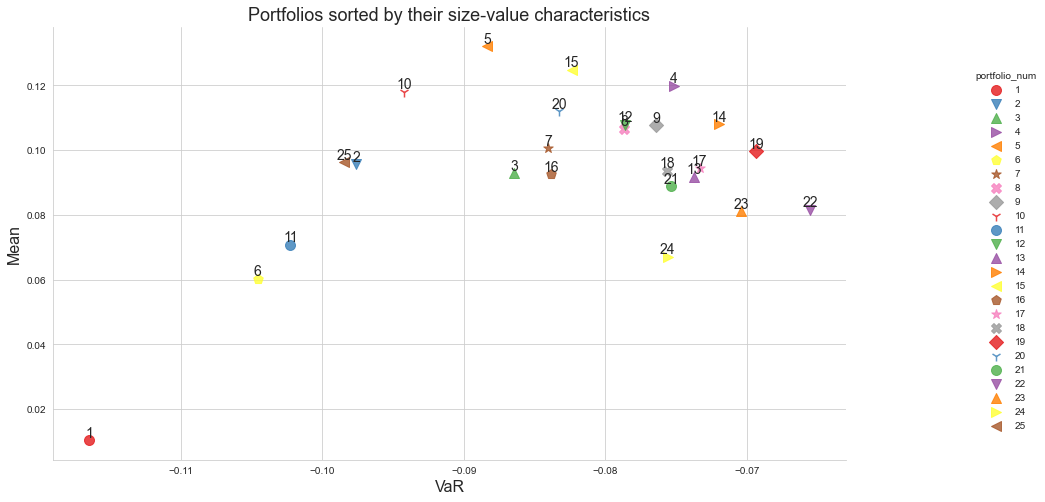

In [50]:
markers=['o', 'v', '^', '>', '<', 'p', '*', 'X', 'D', '1','o',\
         'v', '^', '>', '<', 'p', '*', 'X', 'D', '1','o', 'v', '^', '>', '<']
sns.set_style("whitegrid")
ax = sns.lmplot('VaR', # Horizontal axis
               'Mean', # Vertical axis
               hue='portfolio_num',palette="Set1",scatter_kws={"s": 100},
                data=port_summary, # Data source
               fit_reg=False, # Don't fix a regression line
               markers=markers,
               aspect =1) # size and dimension
ax.fig.set_figwidth(16)
ax.fig.set_figheight(7)
plt.title('Portfolios sorted by their size-value characteristics', fontsize=18)
plt.xlabel('VaR', fontsize=16)
plt.ylabel('Mean', fontsize=16)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(int(point['val'])), fontsize=14,\
                horizontalalignment='center', verticalalignment='bottom')

label_point(port_summary.VaR, port_summary.Mean,port_summary.portfolio_num, plt.gca())

<span style="color:#00008B">**Solution:**</span> The mean vs vol graph makes it very clear that vol is not the determinant of mean. The higher vol portfolios actually have lower means. The mean vs VaR plot is also a very week relationship.

In [52]:
# 2(a)(b)
capm_data = portfolios_ex.join(df['Mkt-RF'])["1981":]

In [53]:
capm_report = pd.DataFrame(index=portfolios_ex.columns)
rhs = sm.add_constant(capm_data['Mkt-RF'])
bm_residuals = pd.DataFrame(columns=portfolios_ex.columns)
t_p_values = pd.DataFrame()

for portf in portfolios_ex.columns:
    lhs = capm_data[portf]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    capm_report.loc[portf, 'alpha_hat'] = res.params['const'] * 12
    capm_report.loc[portf, 'beta_hat'] = res.params['Mkt-RF']
    capm_report.loc[portf, 'info_ratio'] = np.sqrt(12) * res.params['const'] / res.resid.std()
    capm_report.loc[portf, 'treynor_ratio'] = 12 * capm_data[portf].mean() / res.params['Mkt-RF']
    bm_residuals[portf] = res.resid
    t_p_values.loc[portf, 't-value'] = res.params['const']
    t_p_values.loc[portf, 't-value'] = res.tvalues['const']
    t_p_values.loc[portf, 'p-value'] = round(res.pvalues['const'], 4)

In [54]:
capm_report

,alpha_hat,beta_hat,info_ratio,treynor_ratio
SMALL LoBM,-0.0987,1.3600,-0.5750,0.0077
ME1 BM2,0.0018,1.1702,0.0122,0.0818
ME1 BM3,0.0097,1.0365,0.0857,0.0896
ME1 BM4,0.0425,0.9652,0.3585,0.1243
SMALL HiBM,0.0526,0.9907,0.3778,0.1333
ME2 BM1,-0.0475,1.3433,-0.3677,0.0449
ME2 BM2,0.0101,1.1286,0.0984,0.0892
ME2 BM3,0.0248,1.0193,0.2712,0.1046
ME2 BM4,0.0303,0.9654,0.3094,0.1116
ME2 BM5,0.0292,1.1086,0.2363,0.1066


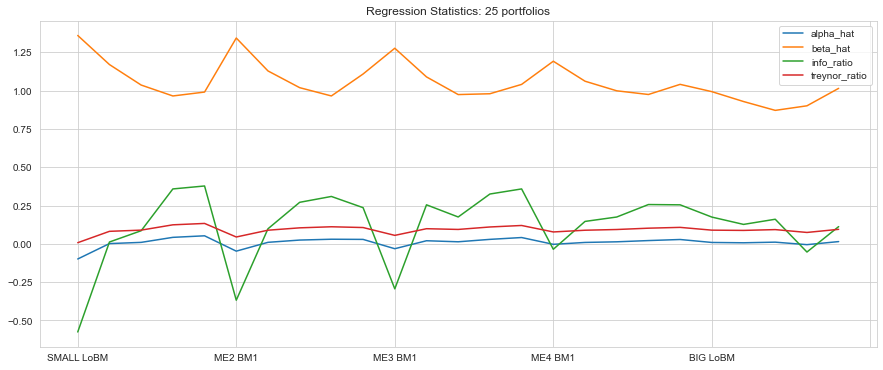

In [66]:
(capm_report.plot(figsize=(15,6),title = "Regression Statistics: 25 portfolios"));

From above plot, it can be observed that Alpha Hat is near zero for almost all the factors. If CAPM were true, these alpha values should have been all zero. Also the Treynor ratio would be equal to mean excess return of the market.

In [61]:
#3

# The dependent variable, (y): mean excess returns from each of the n = 25 portfolios.
y = subsample.mean()

# The regressor, (x): the market beta from each of the n = 25 time-series regressions.
X = sm.add_constant(capm_report['beta_hat'])

res = sm.OLS(y,X,missing='drop').fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     8.008
Date:                Sun, 23 Oct 2022   Prob (F-statistic):            0.00950
Time:                        09:48:17   Log-Likelihood:                 123.51
No. Observations:                  25   AIC:                            -243.0
Df Residuals:                      23   BIC:                            -240.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0165      0.003      5.362      0.000       0.010       0.023
beta_hat      -0.0082      0.003     -2.830      0.009      -0.014      -0.002
==============================================================================
Omnibus:                        4.531   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                2.975
Skew:                          -0.820   Prob(JB):                        0.226
Kurtosis:                       3.408   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
#3(a) Report R-squared

res.rsquared

0.25824511921363413

In [63]:
#3(b) Report the intercept
res.params[0] * 12

0.19798077049490984

In [64]:
#3(c) Report the regression coefficient
res.params[1] * 12

-0.09815760379979335

In [65]:
capm_data['Mkt-RF'].mean() * 12

0.08024879999999998

<span style="color:#00008B">**Solution:**</span> CAPM does not say anything about r-squared. CAPM says the market beta is the only risk associated with higher average returns, the intercept would be 0, and the regression coefficient $\lambda_m$ should be equal to the mean excess market return. 

4. Broadly speaking, do these results support DFA’s belief in size and value portfolios containing premia unrelated to the CAPM?

<span style="color:#00008B">**Solution:**</span> The answer can be yes and no. Our results support DFA's view that risks beyond market beta matter, but there's no enough evidence to show that size and value factors matter.  